<a href="https://colab.research.google.com/github/nataliamarcoliino/prompts-recipe-to-create-a-ebook/blob/main/C%C3%B3pia_de_01_an%C3%A1lise_explorat%C3%B3ria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados
- Conjunto de dados: `Students Habits Performance` (Performance dos Hábitos de Estudantes)
- Cientistas de dados:
    - Fernanda Ortega
   - João
   - Juliana Pontes
   - Paulo
   - Agda Souza
   - Maria Natália

# Preparação
- Carregamento de bibliotecas
- Configuração de estilo dos gráficos

In [ ]:
import pandas as pd
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from matplotlib.lines import Line2D
import math

# Configuração geral do tema
sns.set_theme(style="whitegrid", context="notebook")

# =========================
# Paletas (categorias em PT)
# =========================

palette_dict = {
    'trabalha_lbl': {'Não trabalha': '#bdbdbd', 'Trabalha': '#7b1fa2'},
    'extra_lbl':    {'Não faz extra': '#bdbdbd', 'Faz extra': '#7b1fa2'},
    'diet_quality': {'Ruim': '#e53935', 'Média': '#f9a825', 'Boa': '#43a047'},
    'internet_quality': {'Ruim': '#e53935', 'Média': '#f9a825', 'Boa': '#43a047'},
    'parental_education_level': 'Blues',
    'gender': 'Set2',
}



# Leitura do conjunto de dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/omadson/datasets/main/datasets/student_habits_performance.csv")

In [ ]:
labels_pt = {
    'social_media_hours': 'Horas de Redes Sociais',
    'netflix_hours': 'Horas de Netflix',
    'exam_score': 'Nota Final',
    'study_hours_per_day': 'Horas de Estudo/Dia',
    'attendance_percentage': '% de Presença',
    'mental_health_rating': 'Saúde Mental (1-10)',
    'sleep_hours': 'Horas de Sono',
    'exercise_frequency': 'Freq. de Exercícios',
    'part_time_job': 'Trabalha Meio Período?',
    'extracurricular_participation': 'Faz Atividade Extracurricular?',
    'diet_quality': 'Qualidade da Dieta',
    'parental_education_level': 'Escolaridade dos Pais',
    'internet_quality': 'Qualidade da Internet',
    'gender': 'Gênero'
}

# ----- ordens -----
# ----- ordens -----
orders = {
    'diet_quality': ['Ruim', 'Média', 'Boa'],
    'internet_quality': ['Ruim', 'Média', 'Boa'],
    'parental_education_level': ['Ensino Médio', 'Graduação', 'Mestrado'],
    'gender': ['Feminino', 'Masculino', 'Outro'],
    'trabalha_lbl': ['Não trabalha', 'Trabalha'],
    'extra_lbl': ['Não faz extra', 'Faz extra'],
}

def normaliza_sim_nao(s):
    return (s.astype(str).str.strip()
            .replace({'Yes':'Sim','No':'Não','True':'Sim','False':'Não','1':'Sim','0':'Não'}))

def resolve_palette(col, order):
    pal = palette_dict.get(col)
    if pal is None:
        return None
    if isinstance(pal, dict):
        return {k: pal[k] for k in order if k in pal}
    colors = sns.color_palette(pal, n_colors=len(order))
    return dict(zip(order, colors))

# ----- df_pt -----
df_pt = df.copy()

df_pt['parental_education_level'] = df_pt['parental_education_level'].replace({
    'High School':'Ensino Médio','Bachelor':'Graduação','Master':'Mestrado'
})
df_pt['gender'] = df_pt['gender'].replace({'Female':'Feminino','Male':'Masculino','Other':'Outro'})
df_pt['diet_quality'] = df_pt['diet_quality'].replace({'Poor':'Ruim','Fair':'Média','Good':'Boa'})
df_pt['internet_quality'] = df_pt['internet_quality'].replace({'Poor':'Ruim','Average':'Média','Fair':'Média','Good':'Boa'})

df_pt['part_time_job'] = normaliza_sim_nao(df_pt['part_time_job'])
df_pt['extracurricular_participation'] = normaliza_sim_nao(df_pt['extracurricular_participation'])

df_pt['trabalha_lbl'] = df_pt['part_time_job'].map({'Não': 'Não trabalha', 'Sim': 'Trabalha'})
df_pt['extra_lbl']    = df_pt['extracurricular_participation'].map({'Não': 'Não faz extra', 'Sim':'Faz extra'})


# Informações iniciais

In [ ]:
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Ultimas linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

### Quantidade de valores únicos

,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


Análise Inicial:
* **Volume:** 1.000 linhas e 16 colunas.
* **Integridade:** Dados quase completos; apenas `parental_education_level` possui 91 nulos.
* **Tipagem:** Mescla de dados numéricos (float/int) e categóricos (object).
* **Identificação:** `student_id` é o identificador único para cada entrada.

#Descrição dos Dados
Nesta seção é apresentado o dicionário de dados, que contém:
- Descrição das variáveis do conjunto de dados
- Classificação quanto ao tipo (quantitativa ou qualitativa) e subtipo (nominal, ordinal, discreta ou contínua).

##Dicionário de Dados

In [ ]:
dicionario = pd.DataFrame({
    'variavel': [
        'student_id',
        'age',
        'gender',
        'study_hours_per_day',
        'social_media_hours',
        'netflix_hours',
        'part_time_job',
        'attendance_percentage',
        'sleep_hours',
        'diet_quality',
        'exercise_frequency',
        'parental_education_level',
        'internet_quality',
        'mental_health_rating',
        'extracurricular_participation',
        'exam_score'
    ],

    'descricao': [
        'Identificador único do estudante',
        'Idade do estudante em anos',
        'Gênero do estudante',
        'Horas de estudo por dia',
        'Horas diárias em redes sociais',
        'Horas diárias assistindo Netflix',
        'Indica se possui trabalho de meio período',
        'Percentual de presença nas aulas',
        'Horas de sono por dia',
        'Qualidade da alimentação',
        'Frequência de exercícios físicos',
        'Nível de escolaridade dos pais',
        'Qualidade da conexão de internet',
        'Avaliação da saúde mental (escala)',
        'Participação em atividades extracurriculares',
        'Nota final no exame'
    ],

    'tipo': [
        'Qualitativa',
        'Quantitativa',
        'Qualitativa',
        'Quantitativa',
        'Quantitativa',
        'Quantitativa',
        'Qualitativa',
        'Quantitativa',
        'Quantitativa',
        'Qualitativa',
        'Quantitativa',
        'Qualitativa',
        'Qualitativa',
        'Quantitativa',
        'Qualitativa',
        'Quantitativa'
    ],

    'subtipo': [
        'Nominal',
        'Discreta',
        'Nominal',
        'Contínua',
        'Contínua',
        'Contínua',
        'Nominal',
        'Contínua',
        'Contínua',
        'Ordinal',
        'Discreta',
        'Ordinal',
        'Ordinal',
        'Discreta',
        'Nominal',
        'Contínua'
    ]
})

dicionario


,variavel,descricao,tipo,subtipo
0,student_id,Identificador único do estudante,Qualitativa,Nominal
1,age,Idade do estudante em anos,Quantitativa,Discreta
2,gender,Gênero do estudante,Qualitativa,Nominal
3,study_hours_per_day,Horas de estudo por dia,Quantitativa,Contínua
4,social_media_hours,Horas diárias em redes sociais,Quantitativa,Contínua
5,netflix_hours,Horas diárias assistindo Netflix,Quantitativa,Contínua
6,part_time_job,Indica se possui trabalho de meio período,Qualitativa,Nominal
7,attendance_percentage,Percentual de presença nas aulas,Quantitativa,Contínua
8,sleep_hours,Horas de sono por dia,Quantitativa,Contínua
9,diet_quality,Qualidade da alimentação,Qualitativa,Ordinal


#Análise Univariada

In [ ]:
display(Markdown("# Análise Univariada"))

# Análise Univariada

In [ ]:
display(Markdown("## Separação das variáveis"))

variaveis_quantitativas = dicionario.query("tipo == 'Quantitativa'")['variavel'].tolist()
variaveis_qualitativas = dicionario.query("tipo == 'Qualitativa'")['variavel'].tolist()

print("Quantitativas:", variaveis_quantitativas)
print("Qualitativas:", variaveis_qualitativas)


## Separação das variáveis

Quantitativas: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Qualitativas: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


In [ ]:
display(Markdown("## Resumo estatístico"))

display(Markdown("### Variáveis quantitativas"))
display(df[variaveis_quantitativas].describe())

display(Markdown("### Variáveis qualitativas"))
display(df[variaveis_qualitativas].describe())


## Resumo estatístico

### Variáveis quantitativas

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### Variáveis qualitativas

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,909,1000,1000
unique,1000,3,2,3,3,3,2
top,S1999,Female,No,Fair,High School,Good,No
freq,1,481,785,437,392,447,682


## Distribuição das variáveis quantitativas

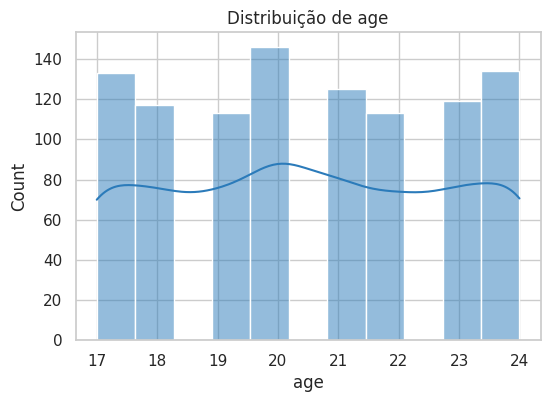

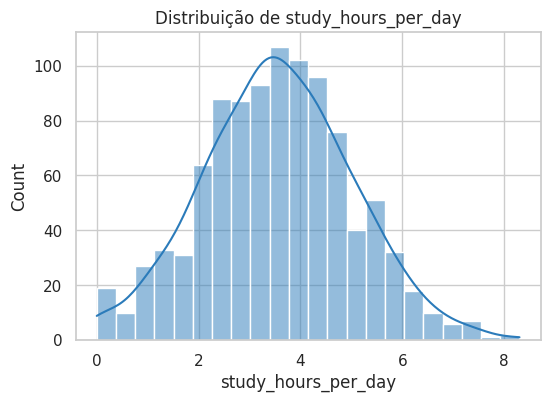

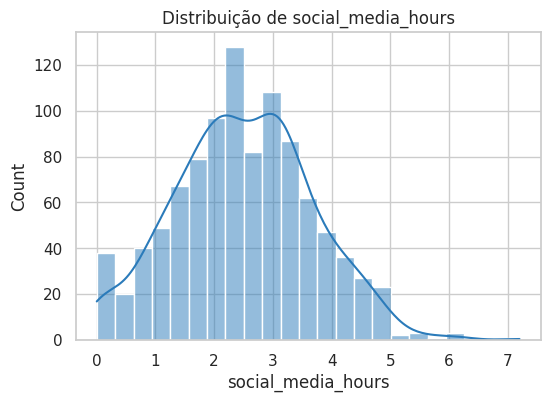

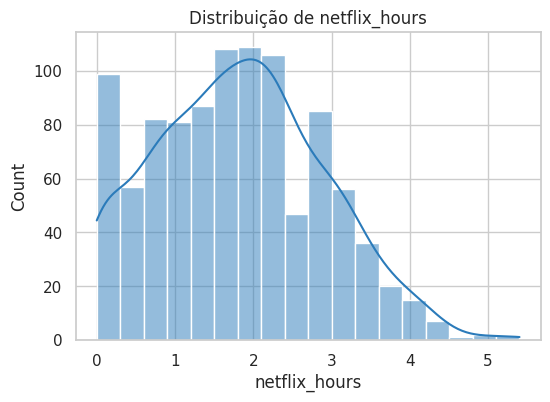

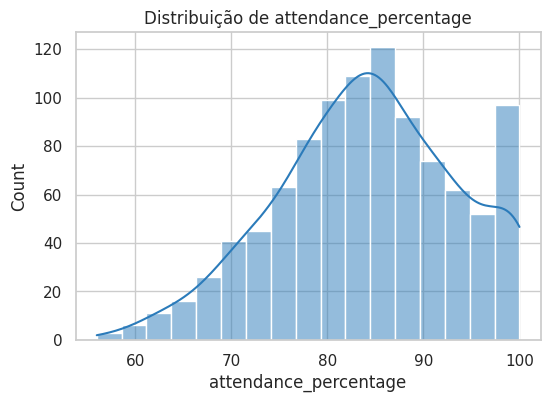

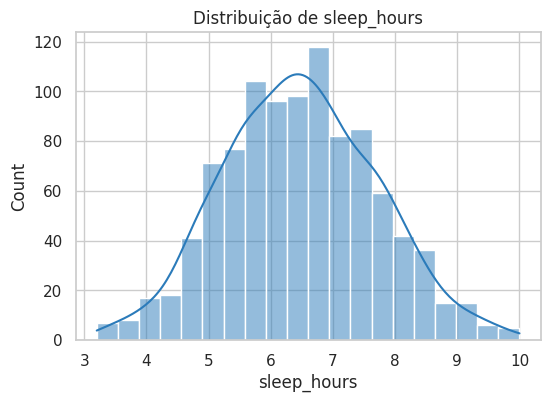

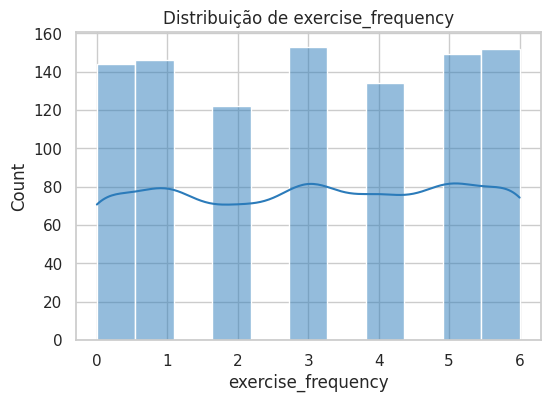

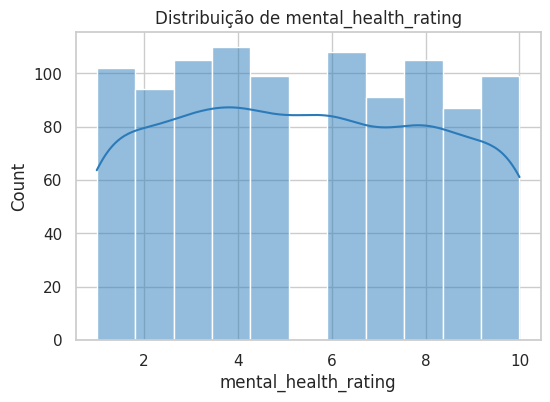

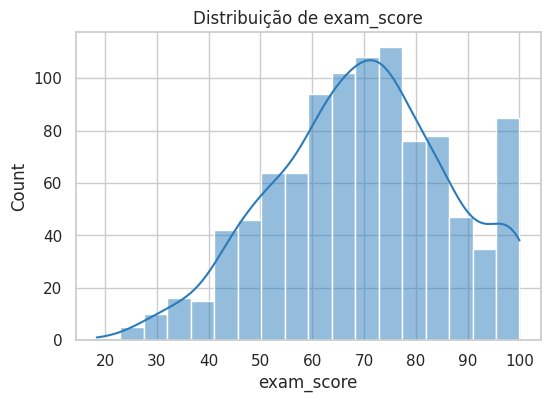

In [ ]:
display(Markdown("## Distribuição das variáveis quantitativas"))

for var in variaveis_quantitativas:

    if var == 'student_id':
        continue

    plt.figure(figsize=(6,4))
    sns.histplot(df[var], kde=True, color='#2b7bba')

    plt.title(f"Distribuição de {var}")
    plt.show()


## Distribuição das variáveis qualitativas

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


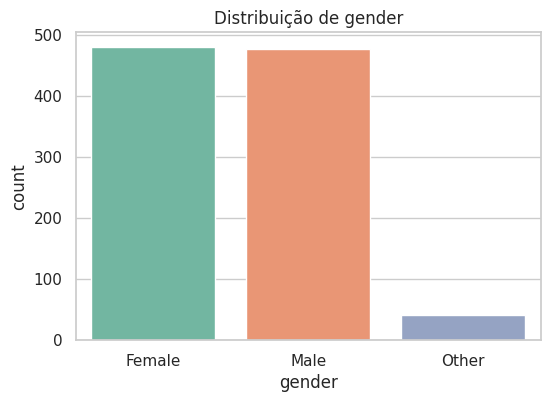

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


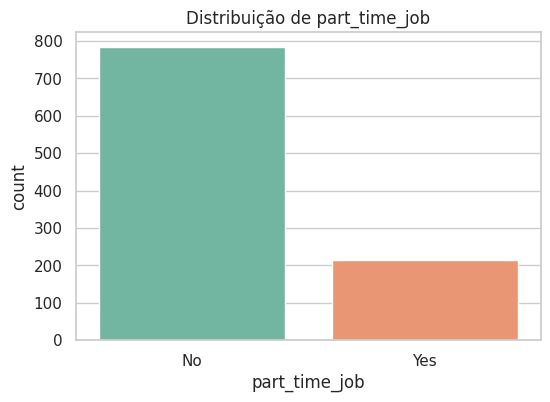

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


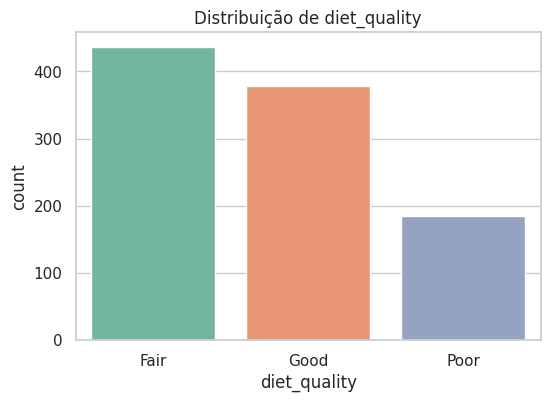

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


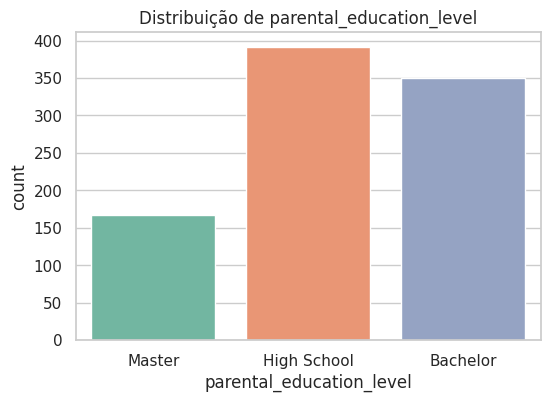

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


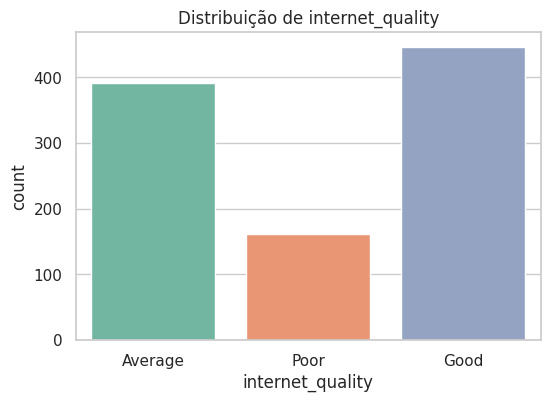

/tmp/ipython-input-3163431750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='Set2')


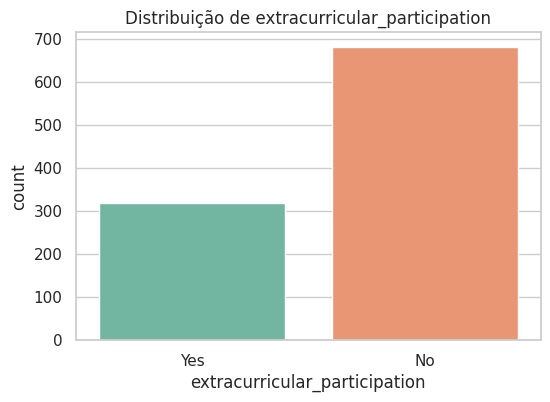

In [ ]:
display(Markdown("## Distribuição das variáveis qualitativas"))

for var in variaveis_qualitativas:

    if var == 'student_id':
        continue

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=var, palette='Set2')

    plt.title(f"Distribuição de {var}")
    plt.show()

In [ ]:
display(Markdown("## Interpretação"))

for var in variaveis_quantitativas:

    if var == 'student_id':
        continue

    media = df[var].mean()

    display(Markdown(f"""
### {var}

Média: {media:.2f}

Os valores dessa variável mostram a distribuição entre os estudantes.
"""))


## Interpretação


### age

Média: 20.50

Os valores dessa variável mostram a distribuição entre os estudantes.



### study_hours_per_day

Média: 3.55

Os valores dessa variável mostram a distribuição entre os estudantes.



### social_media_hours

Média: 2.51

Os valores dessa variável mostram a distribuição entre os estudantes.



### netflix_hours

Média: 1.82

Os valores dessa variável mostram a distribuição entre os estudantes.



### attendance_percentage

Média: 84.13

Os valores dessa variável mostram a distribuição entre os estudantes.



### sleep_hours

Média: 6.47

Os valores dessa variável mostram a distribuição entre os estudantes.



### exercise_frequency

Média: 3.04

Os valores dessa variável mostram a distribuição entre os estudantes.



### mental_health_rating

Média: 5.44

Os valores dessa variável mostram a distribuição entre os estudantes.



### exam_score

Média: 69.60

Os valores dessa variável mostram a distribuição entre os estudantes.


A maioria dos estudantes estuda entre 3 e 6 horas por dia, com média de 4,8 horas.

Existem poucos estudantes com valores extremos, indicando baixa presença de outliers.

#Análise Bivariada

##Relação entre variáveis quantitativas

###Comportamento par a par

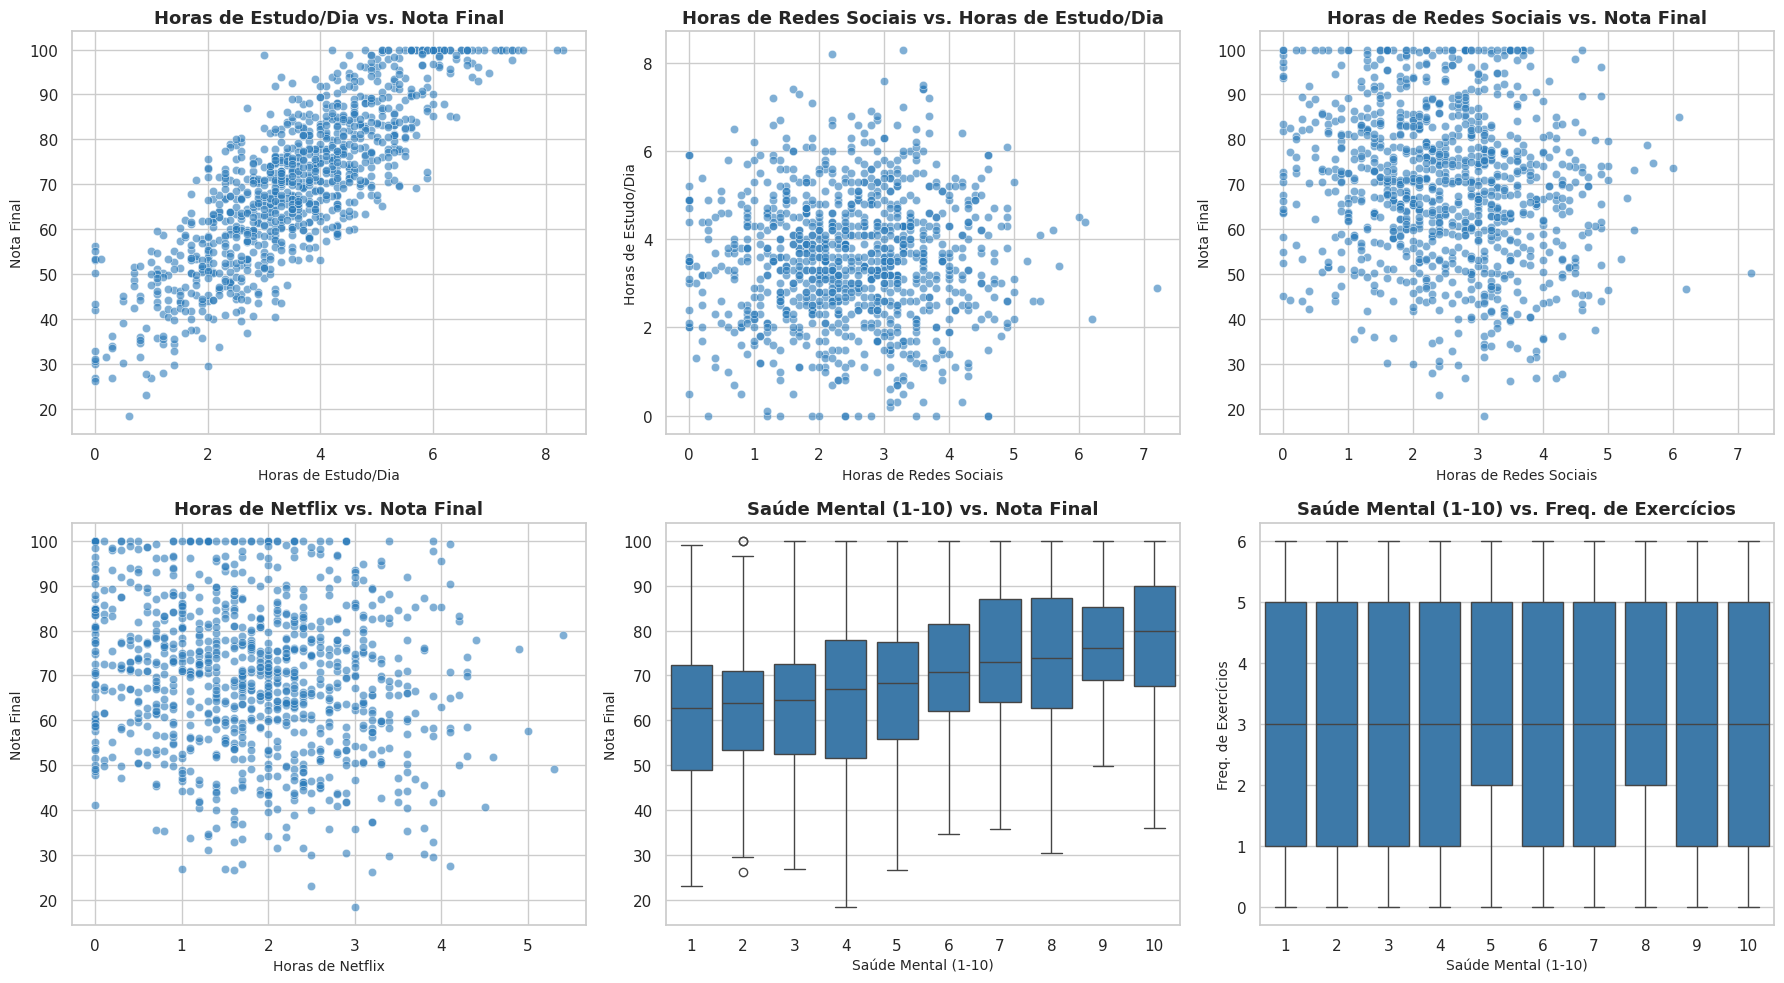

In [ ]:
# Definição dos pares relevantes
relevant_pairs = [
    ('exam_score', 'study_hours_per_day'),
    ('study_hours_per_day', 'social_media_hours'),
    ('exam_score', 'social_media_hours'),
    ('exam_score', 'netflix_hours'),
    ('exam_score', 'mental_health_rating'),
    ('exercise_frequency', 'mental_health_rating')
]

main_plot_color = '#2b7bba'

fig, axes = plt.subplots(figsize=(18, 10), ncols=3, nrows=2, squeeze=False)
axes = axes.flatten()

for i, (var_y, var_x) in enumerate(relevant_pairs):
    subtypes = dicionario.query('variavel == [@var_x, @var_y]').subtipo.to_list()

    # lógica de escolha do gráfico
    if 'Discreta' in subtypes:
        sns.boxplot(data=df, x=var_x, y=var_y, ax=axes[i], color=main_plot_color)
    else:
        sns.scatterplot(data=df, x=var_x, y=var_y, ax=axes[i], color=main_plot_color, alpha=0.6)

    label_x_pt = labels_pt.get(var_x, var_x)
    label_y_pt = labels_pt.get(var_y, var_y)

    axes[i].set_title(f"{label_x_pt} vs. {label_y_pt}", fontweight='bold', size=13)
    axes[i].set_xlabel(label_x_pt, fontsize=10)
    axes[i].set_ylabel(label_y_pt, fontsize=10)

plt.tight_layout()
plt.show()

---
Tendências (Scatterplots)

- Estudo vs. Nota: Preditor dominante, pois a relação linear é nítida e robusta, confirmando que o volume de horas estudadas é fator expressivo para o aumento da nota.

- Redes Sociais vs. Estudo: Independência temporal, já que pontos dispersos comprovam que o alto uso de redes sociais não reduz a quantidade de horas de estudo, sáo rotinas coexistentes.

- Redes Sociais/Netflix vs. Nota: Há uma penalidade de eficiência, a leve inclinação negativa indica que o excesso de telas prejudica a qualidade do aprendizado, gerando um desempenho ligeiramente inferior na nota.

Distribuição (Boxplots)

- Saúde Mental vs. Nota: Consistência de performance, alunos com avaliações de saúde mental altas apresentam medianas superiores e menor variação de notas.

- Saúde Mental vs. Exercícios: Ruído estatístico, pois a estagnação das medianas através dos níveis de saúde mental confirma que a frequência de exercícios não é um discriminante linear para o bem-estar emocional nesta amostra.
---

###Correlação

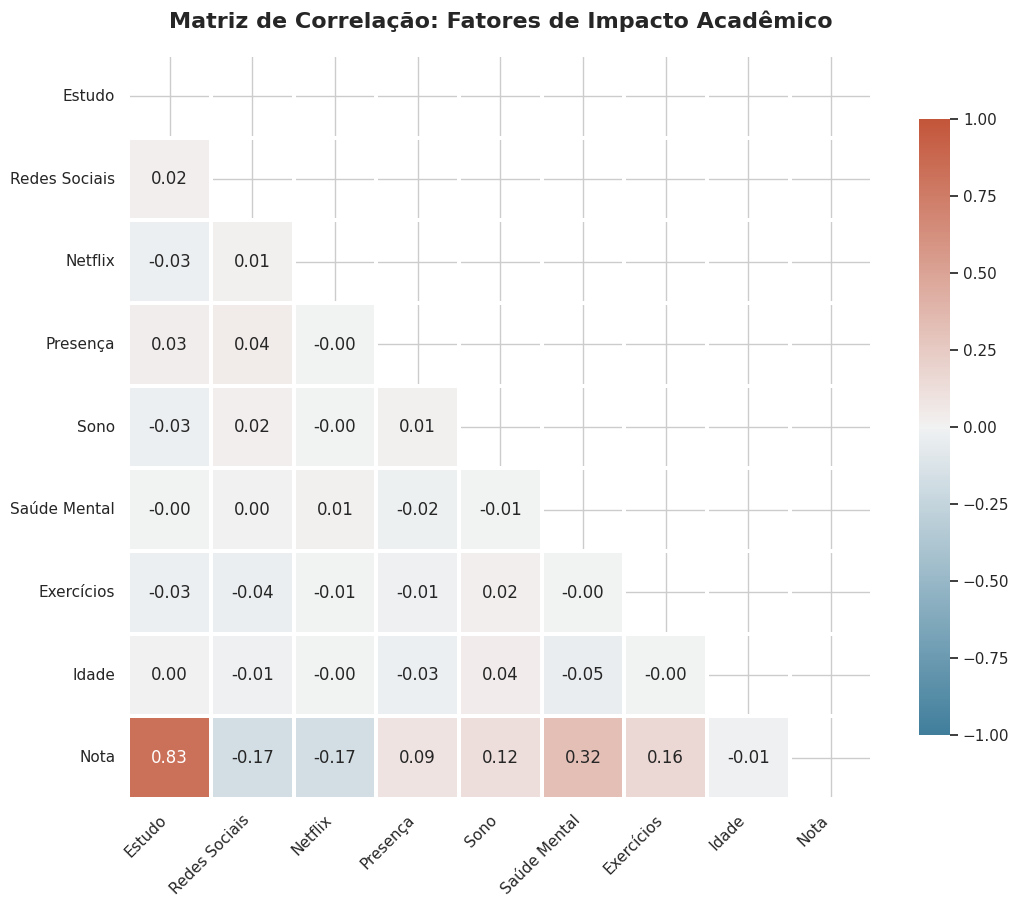

In [ ]:
# Matriz de Correlação
matrix_labels = {
    'study_hours_per_day': 'Estudo',
    'social_media_hours': 'Redes Sociais',
    'netflix_hours': 'Netflix',
    'attendance_percentage': 'Presença',
    'sleep_hours': 'Sono',
    'mental_health_rating': 'Saúde Mental',
    'exercise_frequency': 'Exercícios',
    'age': 'Idade',
    'exam_score': 'Nota'
}

quantitative_columns = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'mental_health_rating',
    'exercise_frequency', 'age', 'exam_score'
]

correlation_matrix = df[quantitative_columns].corr()

correlation_matrix.columns = [matrix_labels.get(col, col) for col in correlation_matrix.columns]
correlation_matrix.index = [matrix_labels.get(idx, idx) for idx in correlation_matrix.index]

# Configuração do Heatmap
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap= sns.diverging_palette(230, 20, as_cmap=True),
    center=0,
    vmin=-1, vmax=1,
    linewidths=1.5,
    square=True,
    cbar_kws={"shrink": .8}
)

plt.title('Matriz de Correlação: Fatores de Impacto Acadêmico', fontweight='bold', size=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

---
Correlações Positivas

- Estudo vs. Nota Final (0.83): Correlação muito forte. Confirma-se matematicamente como a variável de maior peso preditivo, onde a variação da nota é explicada majoritariamente pelo tempo de estudo.

- Saúde Mental vs. Nota Final (0.32): Aparece como um segundo eixo relevante de desempenho: além do estudo (r=0,83), alunos com maior avaliação de saúde mental tendem a obter notas mais altas (r=0,32). Isso sugere um papel de consistência/condição de base: energia, foco, que não “substitui” o estudo, mas potencializa o resultado quando o aluno já estuda.

Correlações Negativas/Baixas

- Redes Sociais/Netflix vs. Nota Final (-0.17): Penalidade leve e simétrica. Tanto Redes Sociais quanto Netflix apresentam o mesmo coeficiente negativo, indicando um impacto redutor marginal, porém consistente, no desempenho final.

- Presença vs. Nota Final (0.09): Irrelevância estatística. O coeficiente próximo de zero reforça que a frequência em sala possui baixo poder explicativo para a variação das notas.

Correlações Nulas

- Redes Sociais/Sono vs. Estudo (~0.00): Ortogonalidade. Os coeficientes nulos entre Estudo/Redes (0.02) e Estudo/Sono (-0.03) provam matematicamente que a carga horária dedicada ao estudo independe das outras rotinas do aluno.

- Exercícios vs. Saúde Mental (-0.00): Ausência de linearidade. O valor zero confirma o "ruído" visto nos boxplots: estatisticamente, a frequência de exercícios não prediz o nível de saúde mental nesta amostra específica.

---


##Relação entre variáveis qualitativas

###Contingência

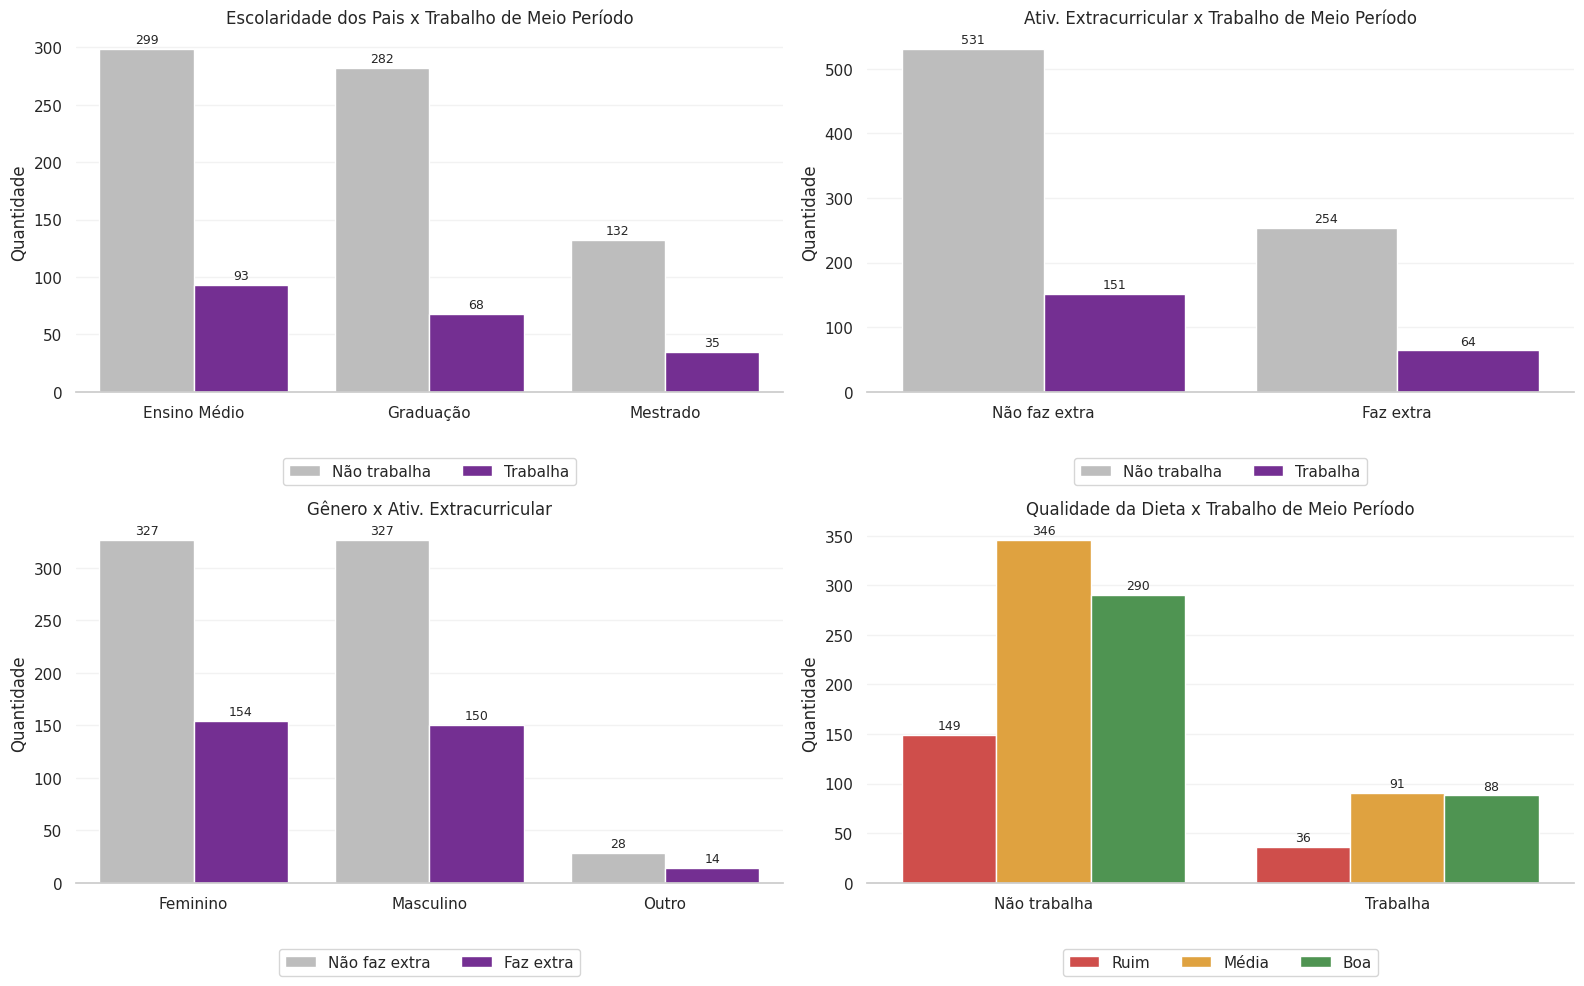

In [ ]:
palette_dict['trabalha_lbl'] = {
    'Não trabalha': '#bdbdbd',
    'Trabalha': '#7b1fa2'
}

palette_dict['extra_lbl'] = {
    'Não faz extra': '#bdbdbd',
    'Faz extra': '#7b1fa2'
}

def plot_cont(ax, data, x, hue, order, hue_order, title):
    pal = resolve_palette(hue, hue_order)
    sns.countplot(data=data, x=x, hue=hue, order=order, hue_order=hue_order, palette=pal, ax=ax)

    for c in ax.containers:
        ax.bar_label(c, fmt="%d", fontsize=9, padding=2)

    ax.set(title=title, xlabel="", ylabel="Quantidade")
    for side in ["left","top","right"]:
        ax.spines[side].set_visible(False)
    ax.grid(axis="y", alpha=0.25)
    ax.legend(title=None, loc="lower center", bbox_to_anchor=(0.5, -0.28), ncol=3, frameon=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

plot_cont(axes[0], df_pt, 'parental_education_level', 'trabalha_lbl',
          orders['parental_education_level'], orders['trabalha_lbl'],
          'Escolaridade dos Pais x Trabalho de Meio Período')

plot_cont(axes[1], df_pt, 'extra_lbl', 'trabalha_lbl',
          orders['extra_lbl'], orders['trabalha_lbl'],
          'Ativ. Extracurricular x Trabalho de Meio Período')

plot_cont(axes[2], df_pt, 'gender', 'extra_lbl',
          orders['gender'], orders['extra_lbl'],
          'Gênero x Ativ. Extracurricular')

plot_cont(axes[3], df_pt, 'trabalha_lbl', 'diet_quality',
          orders['trabalha_lbl'], orders['diet_quality'],
          'Qualidade da Dieta x Trabalho de Meio Período')

plt.tight_layout()
plt.show()

- A taxa de alunos que trabalham é bem parecida entre os níveis de escolaridade dos pais (não tem um “salto” claro de um nível pro outro), o que descarta a hipótese de que alunos com pais que possuem melhores condições optem por não trabalhar.

- Em atividades extracurriculares, a proporção de quem trabalha também fica muito próxima entre “faz” e “não faz”, sugerindo diferença pequena (no máximo um leve deslocamento). Logo, trabalhar não interfere no tempo despendido para atividades extracurriculares.

- A participação em extracurricular por gênero é bem estável entre feminino e masculino.

- Em Qualidade de Dieta x Trabalho de Meio Período, o padrão mais visível é que a distribuição entre Ruim/Média/Boa muda pouco entre “trabalha” e “não trabalha”; o trabalho não interfere na qualidade da alimentação nessa amostra, descartando a hipótese de que a dupla rotina possa levar os alunos a comerem de forma menos saudável e mais rápida (fast-food).

## Relação entre variáveis quantitativas e qualitativas

###Distribuição relativa



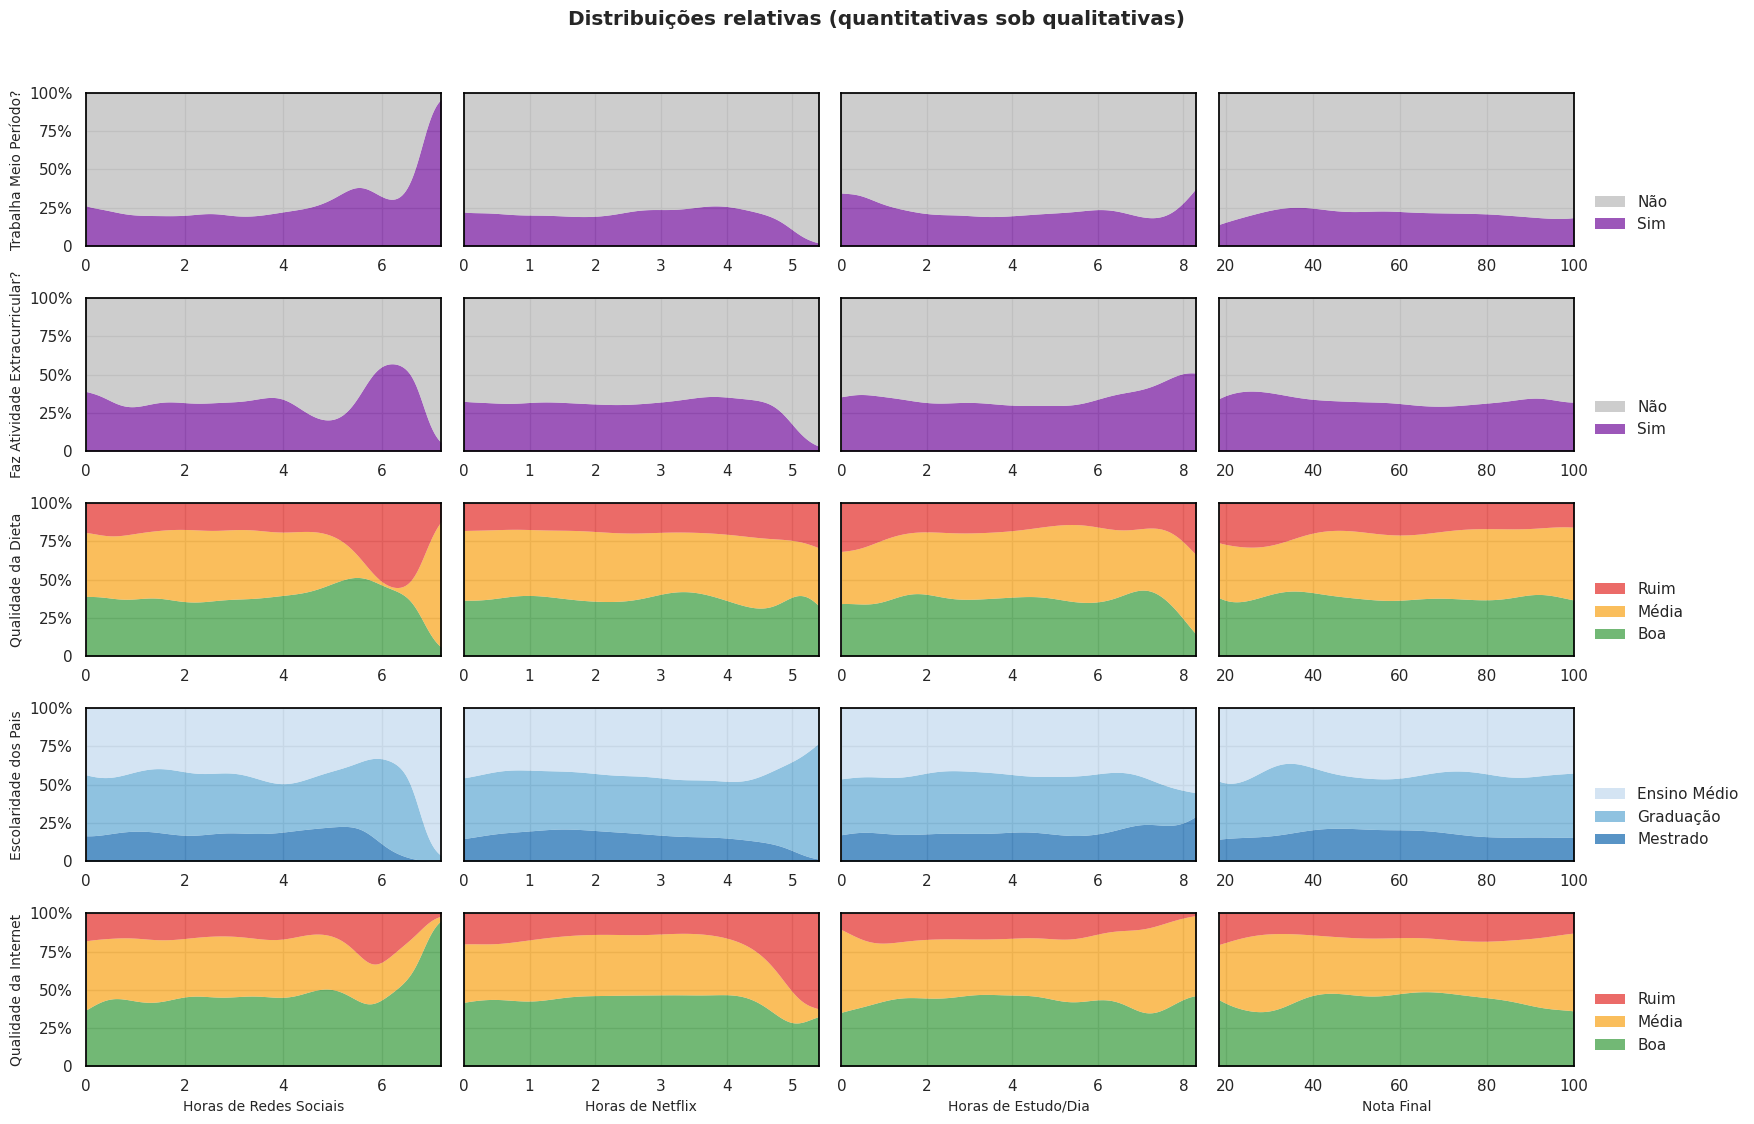

In [ ]:
orders.update({
    'part_time_job': ['Não', 'Sim'],
    'extracurricular_participation': ['Não', 'Sim'],
})

palette_dict.update({
    'part_time_job': {'Não': '#bdbdbd', 'Sim': '#7b1fa2'},
    'extracurricular_participation': {'Não': '#bdbdbd', 'Sim': '#7b1fa2'},
})

def to_num(s):
    """Converte uma Series para tipo numérico, tratando vírgulas como separadores decimais."""
    return pd.to_numeric(s.astype(str).str.replace(",", ".", regex=False), errors="coerce")

def kde_relativa(ax, df_in, hue, x, show_legend):
    d = df_in[[hue, x]].copy()
    d[x] = to_num(d[x])
    d = d.dropna(subset=[hue, x])

    if d.empty:
        ax.set_axis_off()
        return

    hue_order_base = orders.get(hue, list(pd.Series(d[hue].dropna().unique())))
    hue_order = [c for c in hue_order_base if c in set(d[hue])]

    pal = resolve_palette(hue, hue_order)

    sns.kdeplot(
        data=d, x=x, hue=hue, hue_order=hue_order,
        multiple="fill", cut=0, bw_adjust=1.2, gridsize=200,
        palette=pal, linewidth=0, ax=ax, legend=show_legend
    )

    ax.set_ylabel(labels_pt.get(hue, hue), fontsize=10)
    ax.set_xlabel(labels_pt.get(x, x), fontsize=10)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0', '25%', '50%', '75%', '100%'])

    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")

    if show_legend and ax.legend_ is not None:
        ax.legend_.set_title(None)
        ax.legend_.set_frame_on(False)
        ax.legend_.set_bbox_to_anchor((1.02, 0))
        ax.legend_._loc = 3  # lower left

qualis = ['part_time_job','extracurricular_participation','diet_quality','parental_education_level','internet_quality']
quants = ['social_media_hours','netflix_hours','study_hours_per_day','exam_score']

fig, axes = plt.subplots(
    len(qualis), len(quants),
    figsize=(3.8*len(quants)+2.5, 2.2*len(qualis)),
    squeeze=False, sharey=True
)

for r, hue in enumerate(qualis):
    for c, x in enumerate(quants):
        ax = axes[r, c]
        kde_relativa(ax, df_pt, hue, x, show_legend=(c == len(quants)-1))
        if r != len(qualis)-1:
            ax.set_xlabel("")

plt.suptitle("Distribuições relativas (quantitativas sob qualitativas)", fontweight="bold", y=1.02)
plt.subplots_adjust(left=0.16, wspace=0.08, hspace=0.18)
plt.tight_layout()
plt.show()

- Trabalho de Meio Período `Sim` cresce nas faixas mais altas de horas em redes sociais, sugerindo uma rotina com mais “tela” quando a carga do dia é maior, talvez por uma "compensação" pela rotina exaustiva.

- Atividade Extracurricular `Sim` aparece um pouco mais conforme aumentam as horas de estudo/dia, indicando um perfil mais organizado/engajado (estudo + atividades).

- `Qualidade da Dieta` e `Qualidade da Internet` ficam bem estáveis ao longo de redes/Netflix/estudo/nota; quando há “picos” nas pontas, tende a ser efeito de poucos casos.

- `Escolaridade dos Pais` quase não muda a distribuição ao longo das variáveis numéricas (não separa perfis muito distintos na amostra).

No geral, os KDEs mostram associações fracas: as categorias modulam levemente hábitos, mas não criam diferenças grandes nas distribuições.

##Distribuição conjunta

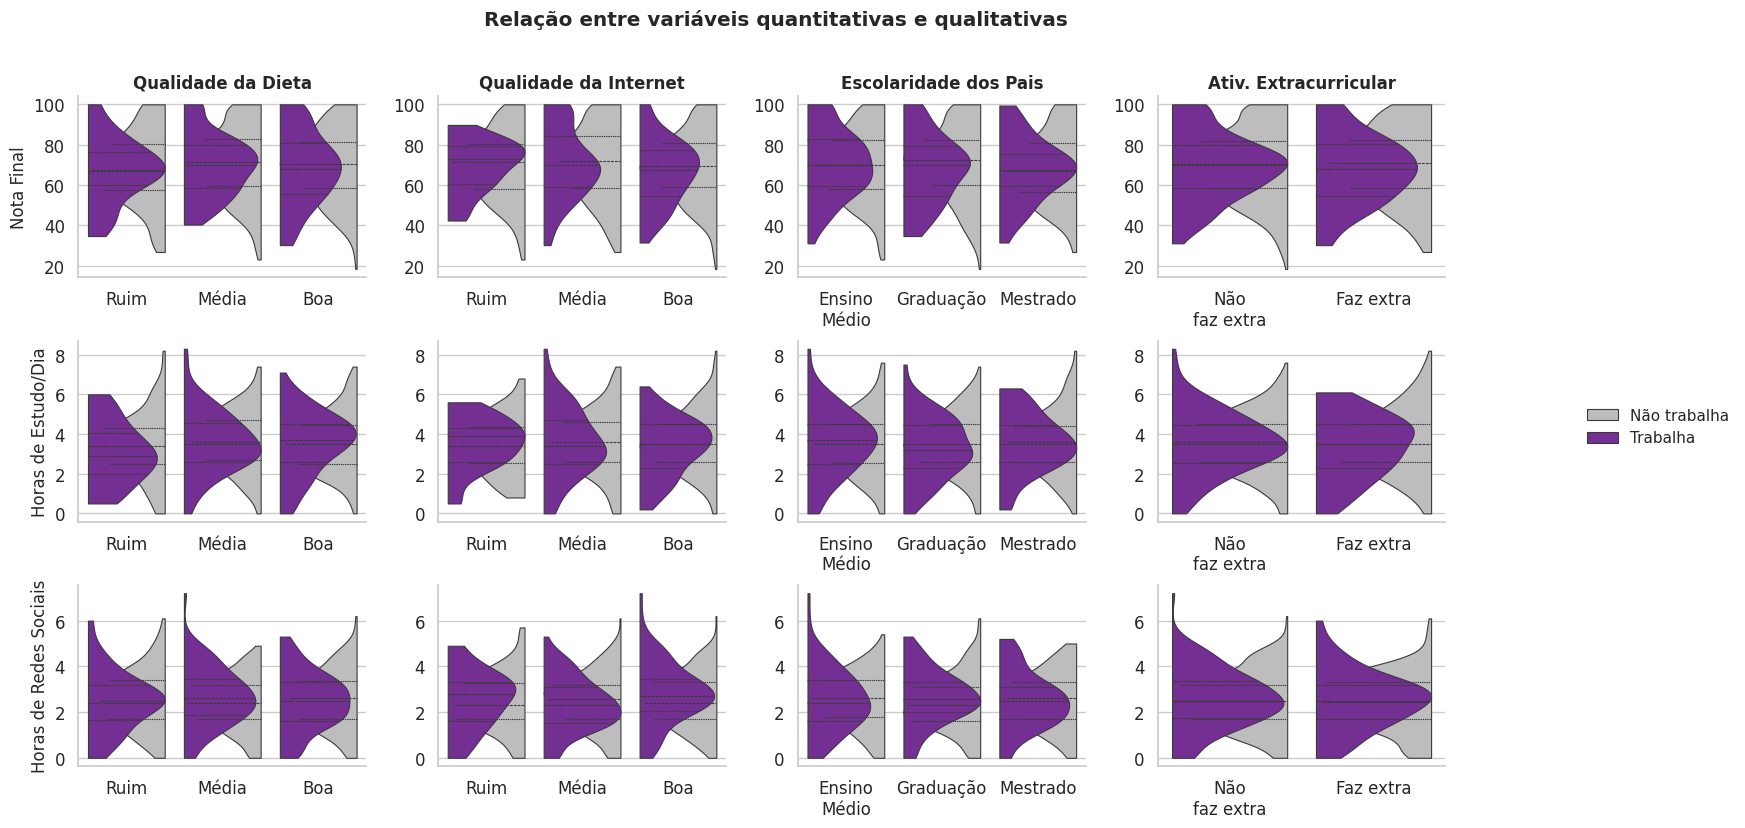

In [ ]:
def grid_violin_quanti_vs_quali(df, qual_vars, quant_vars, hue):
    nrows, ncols = len(quant_vars), len(qual_vars)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(4.2*ncols + 1.8, 2.9*nrows),
        squeeze=False
    )

    col_title = {
        "extra_lbl": "Ativ. Extracurricular",
        "trabalha_lbl": "Trabalho (meio período)",
        "parental_education_level": "Escolaridade dos Pais",
        "diet_quality": "Qualidade da Dieta",
        "internet_quality": "Qualidade da Internet",
    }

    hue_order = orders.get(hue, list(pd.Series(df[hue].dropna().unique())))
    split_ok = df[hue].nunique() == 2
    pal = palette_dict.get(hue, None)

    for r, q in enumerate(quant_vars):
        for c, x in enumerate(qual_vars):
            ax = axes[r, c]

            d = df[[x, q, hue]].copy()
            d[q] = pd.to_numeric(d[q], errors="coerce")
            d = d.dropna(subset=[x, q, hue])

            if d.empty:
                ax.set_axis_off()
                continue

            x_order = orders.get(x, list(pd.Series(d[x].dropna().unique())))

            sns.violinplot(
                data=d, x=x, y=q,
                hue=hue, order=x_order, hue_order=hue_order,
                split=split_ok,
                dodge=not split_ok,
                inner="quartile",
                cut=0,
                linewidth=0.8,
                palette=pal,
                ax=ax
            )
            if r == 0:
                ax.set_title(col_title.get(x, labels_pt.get(x, x)),
                             fontsize=12, fontweight="bold")
            else:
                ax.set_title("")
            ax.set_ylabel(labels_pt.get(q, q) if c == 0 else "", fontsize=12)
            ax.set_xlabel("")

            ax.tick_params(axis="y", labelsize=12)
            ax.tick_params(axis="x", labelsize=12, rotation=0)
            new_ticks = []
            for t in ax.get_xticklabels():
                s = t.get_text()
                if len(s) > 10 and "\n" not in s and " " in s:
                    s = s.replace(" ", "\n", 1)
                new_ticks.append(s)

            ax.set_xticks(range(len(new_ticks)))
            ax.set_xticklabels(new_ticks)

            if ax.legend_ is not None:
                ax.legend_.remove()

            sns.despine(ax=ax, left=False, bottom=False)
    handles, lab = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, lab, loc="center right",
               bbox_to_anchor=(1.02, 0.5), frameon=False, title=None)

    fig.suptitle("Relação entre variáveis quantitativas e qualitativas",
                 y=0.98, fontweight="bold")
    plt.subplots_adjust(right=0.86, wspace=0.25, hspace=0.35)
    plt.show()

qual_vars  = ["diet_quality", "internet_quality", "parental_education_level", "extra_lbl"]
quant_vars = ["exam_score", "study_hours_per_day", "social_media_hours"]

grid_violin_quanti_vs_quali(df_pt, qual_vars, quant_vars, hue="trabalha_lbl")





- O gráfico prova a simetria de desempenho: visualmente, a forma da distribuição das notas dos alunos que trabalham (Roxo) é muito parecida à dos que não trabalham (Cinza). O impacto do trabalho aparece sutilmente na redução das horas de estudo e de redes sociais, confirmando que o aluno trabalhador compensa a falta de tempo com gestão de prioridades, sem deixar a nota cair.


##Contingência

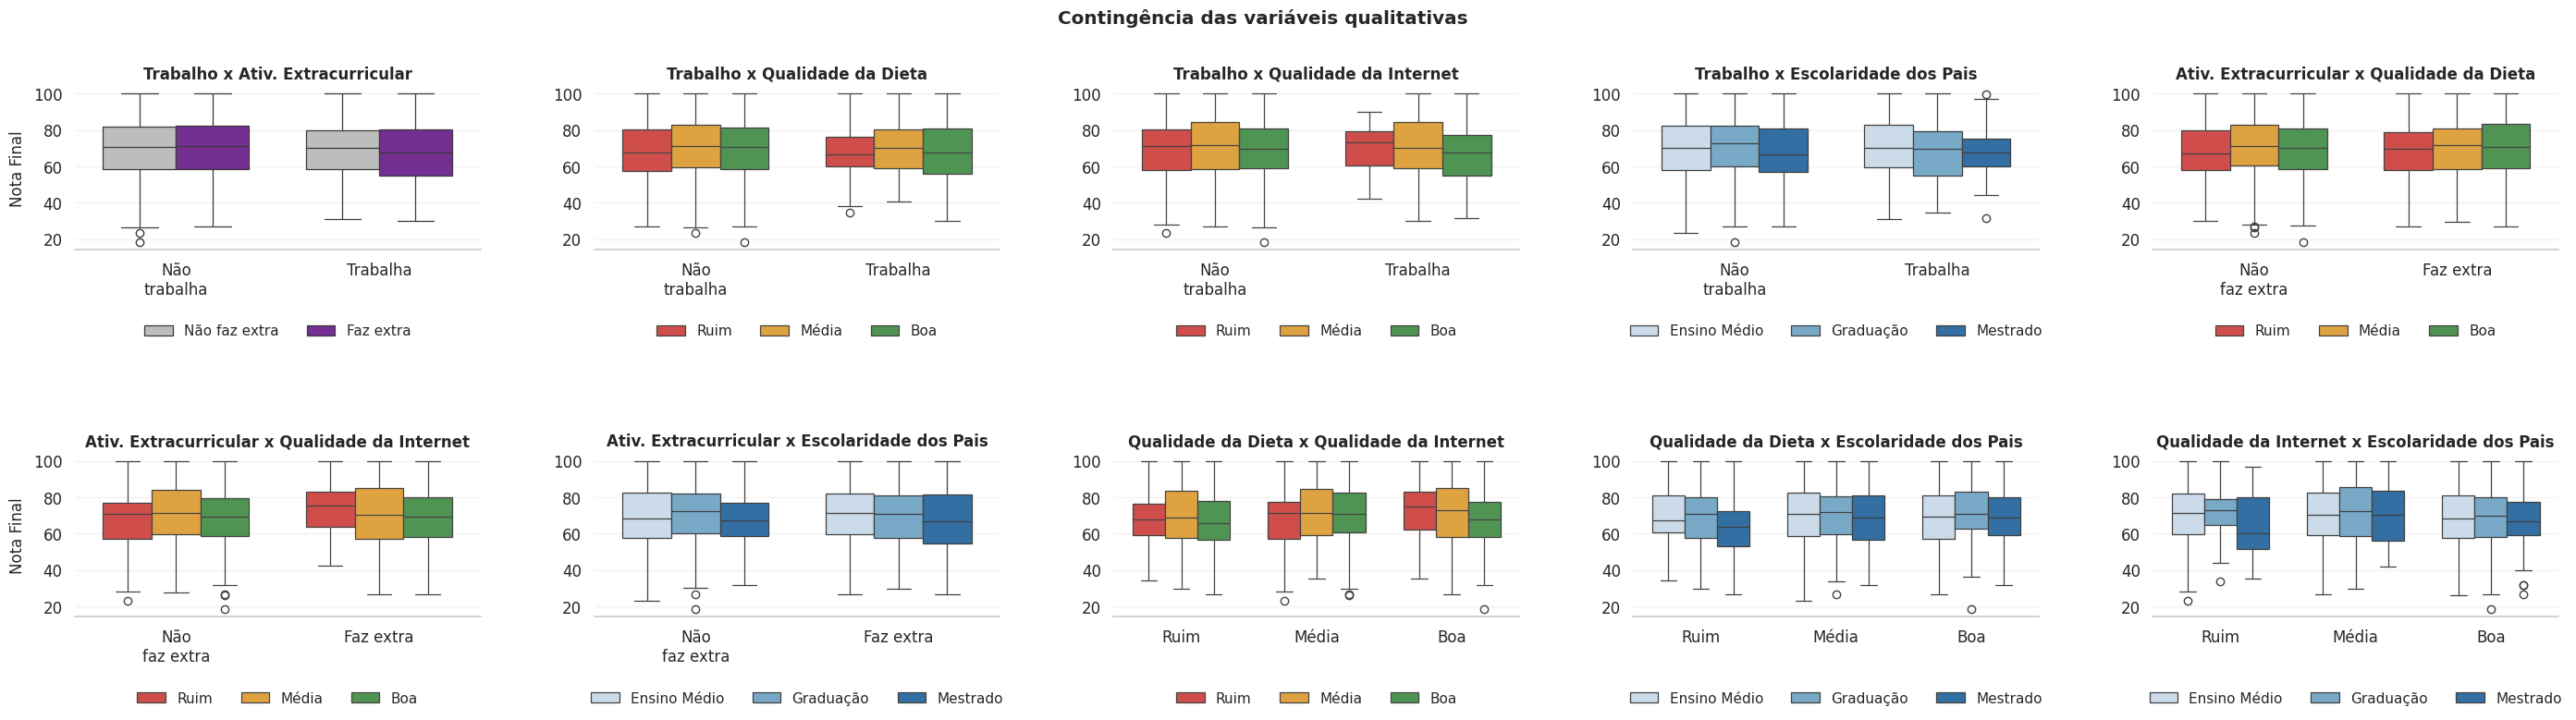

In [ ]:
import matplotlib.ticker as mticker

labels_pt.update({
    "trabalha_lbl": "Trabalho",
    "extra_lbl": "Ativ. Extracurricular",
})

orders.update({
    "trabalha_lbl": ["Não trabalha", "Trabalha"],
    "extra_lbl": ["Não faz extra", "Faz extra"],
})

def contingencia_quali(df, qual_vars, y_var, ncols=5):
    combinacoes = list(itertools.combinations(qual_vars, 2))
    nplots = len(combinacoes)
    nrows = math.ceil(nplots / ncols)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(5.6*ncols + 1.2, 3.5*nrows),
        squeeze=False
    )
    axes = axes.flatten()

    def wrap_ticks(ax, maxlen=10):
        locs = ax.get_xticks()
        ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
        new = []
        for t in ax.get_xticklabels():
            s = t.get_text()
            if len(s) > maxlen and "\n" not in s and " " in s:
                s = s.replace(" ", "\n", 1)
            new.append(s)
        ax.set_xticklabels(new)

    ylab = labels_pt.get(y_var, y_var)

    # loop dos plots
    for i, (var_1, var_2) in enumerate(combinacoes):
        ax = axes[i]

        d = df[[var_1, var_2, y_var]].copy()
        d[y_var] = pd.to_numeric(
            d[y_var].astype(str).str.replace(",", ".", regex=False),
            errors="coerce"
        )
        d = d.dropna(subset=[var_1, var_2, y_var])
        if d.empty:
            ax.set_axis_off()
            continue

        order = orders.get(var_1, list(pd.Series(d[var_1].dropna().unique())))
        hue_order = orders.get(var_2, list(pd.Series(d[var_2].dropna().unique())))
        pal = None
        if "resolve_palette" in globals():
            pal = resolve_palette(var_2, hue_order)
        elif "palette_dict" in globals() and isinstance(palette_dict.get(var_2), dict):
            pal = {k: palette_dict[var_2][k] for k in hue_order if k in palette_dict[var_2]}

        sns.boxplot(
            data=d, x=var_1, y=y_var, hue=var_2,
            order=order, hue_order=hue_order,
            palette=pal,
            width=0.72, fliersize=6, linewidth=0.9,
            ax=ax
        )

        ax.set_title(
            f"{labels_pt.get(var_1, var_1)} x {labels_pt.get(var_2, var_2)}",
            fontsize=12, fontweight="bold"
        )
        ax.set_xlabel("")
        if (i % ncols) == 0:
            ax.set_ylabel(ylab, fontsize=12)
            ax.yaxis.set_label_coords(-0.12, 0.5)
        else:
            ax.set_ylabel("")

        for side in ["left", "top", "right"]:
            ax.spines[side].set_visible(False)
        ax.grid(axis="y", alpha=0.25)
        ax.tick_params(axis="x", labelsize=12, rotation=0)
        ax.tick_params(axis="y", labelsize=12)

        wrap_ticks(ax)

        if ax.legend_ is not None:
            ncol_leg = min(len(hue_order), 5)
            sns.move_legend(
                ax, "lower center",
                bbox_to_anchor=(0.5, -0.62),
                ncol=ncol_leg,
                title=None,
                frameon=False
            )

    for j in range(nplots, len(axes)):
        axes[j].set_axis_off()

    fig.suptitle("Contingência das variáveis qualitativas", fontweight="bold", y=1.02)

    plt.subplots_adjust(hspace=1.25, wspace=0.28, left=0.06, right=0.98, top=0.90, bottom=0.08)
    plt.show()

qual_vars = ["trabalha_lbl", "extra_lbl", "diet_quality", "internet_quality", "parental_education_level"]
contingencia_quali(df_pt, qual_vars, y_var="exam_score", ncols=5)

- Panorama geral: as distribuições de Nota Final ficam bem parecidas entre os grupos, com medianas próximas e IQR semelhante.

- Sem “dois perfis”: Trabalho, extra, dieta, internet e escolaridade dos pais não separam a amostra em perfis acadêmicos distintos.

- Efeitos sutis: dieta e internet melhores aparecem às vezes com medianas ligeiramente maiores, mas sem salto claro.

- Trabalho/extra: tendem a atuar como moduladores de rotina, não como determinantes fortes da nota.

- Outliers em todo recorte: existem alunos de alto desempenho em várias condições, reforçando que não é um fator único.

- Conclusão: o impulsionador da variação da nota segue sendo quantitativo (horas de estudo).

# Sumário de Insights e Hipóteses

- O retrato que aparece nos dados é o de um aluno cujo “motor” do desempenho é bem direto: quanto mais horas de estudo por dia, maior tende a ser a nota, e esse efeito domina a história muito mais do que qualquer variável categórica. Em volta desse motor, entram fatores de estilo de vida que modulam o resultado: redes sociais e Netflix não parecem “roubar” tempo de estudo de forma clara (as rotinas coexistem), mas se relacionam levemente de forma negativa com a nota, o que é compatível com um atrito de eficiência/qualidade do estudo quando o tempo de tela cresce.

- No eixo “perfil e consistência”, a saúde mental aparece como um marcador importante: níveis mais altos tendem a acompanhar notas melhores e um padrão mais regular, com menos volatilidade aparente, enquanto exercícios não surgem como um discriminador linear forte do bem-estar nessa amostra. Sono e presença entram como pano de fundo do aluno mais organizado, mas o que realmente “grita” em termos de explicação de nota continua sendo o volume de estudo.

- Nas variáveis qualitativas (trabalho de meio período, atividade extracurricular, qualidade de dieta, qualidade de internet e escolaridade dos pais), o storytelling é de diferenças pequenas e muita sobreposição entre grupos: elas não criam “dois mundos” acadêmicos separados, e sim camadas de contexto. Dieta e internet melhores podem acompanhar medianas ligeiramente maiores em alguns cruzamentos, mas sem separar fortemente a distribuição; trabalho e extracurricular mudam mais a rotina do que a nota em si (com nuances como maior proporção de quem trabalha em faixas altas de redes sociais e leve sinal de mais extracurricular em faixas maiores de estudo). No fim, o perfil é: melhor desempenho vem de sustentar mais estudo e, junto disso, tender a maior estabilidade/saúde mental. Telas entram como atrito leve, e as categorias funcionam como moduladores discretos de hábitos, não como o motor principal da nota.